# LAPLACE TRANSFORMS FOR REACTION NETWORKS

# Preliminaries

In [23]:
try:
    import controlSBML as ctl
except:
    !pip -q install controlSBML
    import controlSBML as ctl
import control
from controlSBML.util import makeSimulationTimes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import tellurium as te
import sympy
print("controlSBML version: " + ctl.__version__)

controlSBML version: 0.2.7


In [2]:
s, S1, S2, S3, k1, k2, k3, k4 = sympy.symbols("s, S1, S2, S3, k1, k2, k3, k4 ")

# Sequential Pathway

$S_1 \xrightarrow[\text{}]{k_1 S_1} S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_2} S_3$

Find the transfer function for $\frac{S_3}{S_1}$

## Steps
1. Specify the input and output for the transfer function.
1. Write the system equations.
1. Convert to Laplace transforms.
1. Solve for the output LT in terms of the input LT and form the ratio.

### Specify the input and output for the transfer function

### Write the system equations

### Convert the system equations to Laplace transforms

### Solve for LT of the output in terms of the input and form the ratio

# Simulate to check

# Branching

$S_1 \xrightarrow[\text{}]{k_1 S_1} S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_2} S_3$,
$S_2 \xrightarrow[\text{}]{k_3 S_2} S_4$


Find the transfer function for $\frac{S_3}{S_1}$

# Reversible Reaction

$S_1 \xrightarrow[\text{}]{k_1 S_1} S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_2} S_1$


Find the transfer function for $\frac{S_2}{S_1}$

### Write the system equations

\begin{eqnarray}
\dot{S_1} & = & -k_1 S_1 + k_2 S_2 \\
\dot{S_2} & = & k_1 S_1 - k_2 S_2 \\
\end{eqnarray}

### Find the transfer function

In [3]:
expr = -k1*S1 + k2*S2 - s*S1
tf = sympy.solve(expr, S2)[0] / S1
tf

(k1 + s)/k2

What is $\frac{k_1}{k_2}$ in terms of first year chemistry?

# Nonlinear

$S_1 \xrightarrow[\text{}]{k_1 S_1 } S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_1 S_2} S_3$

Find the transfer function for $\frac{S_3}{S_1}$

# Sequential Pathway With a Reversible Reaction

$S_1 \xrightarrow[\text{}]{k_1 S_1} S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_2} S_3$,
$S_3 \xrightarrow[\text{}]{k_3 S_3} S_2$,
$S_3 \xrightarrow[\text{}]{k_4 S_3} \emptyset$

Find the transfer function for $\frac{S_3}{S_1}$

### Write the state equations

\begin{eqnarray}
\dot{S_1} & = & -k_1 S_1 \\
\dot{S_2} & = & k_1 S_1 - k_2 S_2 + k_3 S_3 \\
\dot{S_3} & = & k_2 S_2 - k_3 S_3 \\
\end{eqnarray}

### Convert the system equations to Laplace Transforms

\begin{eqnarray}
s S_1 (s) & = & -k_1 S_1 (s) \\
s S_2 (s)  & = & k_1 S_1(s) - k_2 S_2(s) + k_3 S_3(s) \\
s S_3(s)  & = & k_2 S_2 (s) - k_3 S_3(s) -k_4 S_3(s) \\
\end{eqnarray}

### Express the output in terms of the input

``sympy`` has its limits. It works best if there is one expression with the two variables of interest.

In [4]:
S2_expr = k1*S1 - k2*S2 + k3*S3 - s*S2
S2_subs = sympy.solve(S2_expr, S2)[0]
S2_subs

(S1*k1 + S3*k3)/(k2 + s)

In [5]:
S3_expr = k2*S2 - k3*S3 - k4*S3 - s*S3
new_expr = S3_expr.subs({S2: S2_subs})
result = sympy.solve(new_expr, S3)[0]
result

S1*k1*k2/(k2*k4 + k2*s + k3*s + k4*s + s**2)

In [19]:
tf = result/S1
tf

k1*k2/(k2*k4 + k2*s + k3*s + k4*s + s**2)

In [8]:
numerator, denominator = sympy.fraction(tf)
numerator, denominator

(k1*k2, k2*k4 + k2*s + k3*s + k4*s + s**2)

In [21]:
# We can find the poles symbolically by solving for s
sim_dct = {k1: 1, k2: 2, k3: 2.5, k4: 1}
sympy.solve(denominator.subs(sim_dct), s)

[-5.10849528301415, -0.391504716985849]

In [20]:
dct = dict(sim_dct)
dct.update({s: 0})
tf.subs(dct)

1

What constants can we change to get a DC gain of 4?

## Simulation

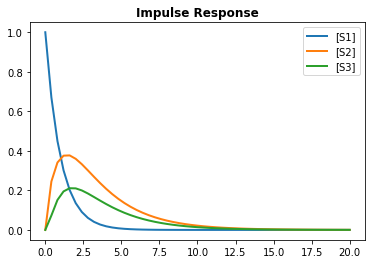

In [15]:
MODEL = """
J1: S1 -> S2; k1*S1
J2: S2 -> S3; k2*S2
J3: S3 -> S2; k3*S3
J4: S3 -> ; k4*S3
k1 = 1
k2 = 2
k3 = 2.5
k4 = 1
S1 = 1
S2 = 0
S3 = 0
"""
RR = te.loada(MODEL)
RR.simulate(0, 20)
RR.plot(title="Impulse Response")

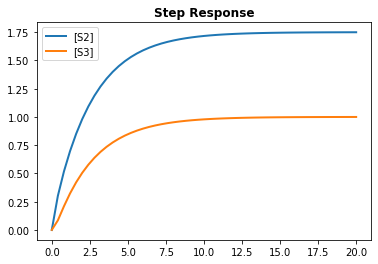

In [13]:
STEP_MODEL = """
J1: $S1 -> S2; k1*$S1
J2: S2 -> S3; k2*S2
J3: S3 -> S2; k3*S3
J4: S3 -> ; k4*S3
k1 = 1
k2 = 2
k3 = 2.5
k4 = 1
$S1 = 1
S2 = 0
S3 = 0
"""
rr = te.loada(STEP_MODEL)
rr.simulate(0, 20)
rr.plot(title="Step Response")

In [30]:
ctlsb = ctl.ControlSBML(MODEL, input_names=["S1"], output_names=["S3"])
tf = ctlsb.makeTransferFunction()

In [12]:
tf.dcgain()

0.9999999999999996

In [16]:
tf.pole()

array([-5.10849528, -1.        , -0.39150472])

We got one more pole than solving symbolically beause the symbolic solution simplified the system by eliminating $S_2$.

In [73]:
state_space = ctlsb.makeStateSpace()
times = [0.01*v for v in range(5001)]
result = control.forced_response(tf, times, np.repeat(10, len(times)))

In [47]:
tf

TransferFunction(array([2.]), array([1. , 6.5, 7.5, 2. ]))

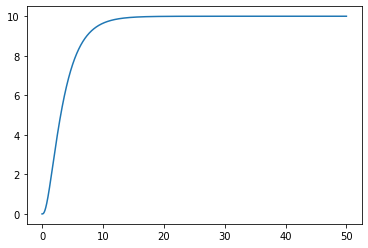

In [71]:
plt.plot(result.t, result.outputs)

In [63]:
result.y

array([[10.        ,  9.85405232,  9.71592591,  9.58521186,  9.46152184,
         9.34448712,  9.23375758,  9.12900077,  9.02990104,  8.93615868,
         8.84748914,  8.7636223 ,  8.68430168,  8.60928382,  8.5383376 ,
         8.47124363,  8.40779367,  8.34779005,  8.29104518,  8.237381  ,
         8.18662854,  8.13862744,  8.09322554,  8.05027845,  8.00964918,
         7.97120775,  7.93483084,  7.9004015 ,  7.86780875,  7.83694735,
         7.80771749,  7.78002449,  7.7537786 ,  7.7288947 ,  7.70529209,
         7.68289428,  7.66162873,  7.64142672,  7.6222231 ,  7.60395615,
         7.58656737,  7.57000137,  7.55420565,  7.53913049,  7.52472882,
         7.51095608,  7.49777005,  7.48513079,  7.47300051,  7.46134343,
         7.45012571,  7.43931536,  7.42888211,  7.41879734,  7.409034  ,
         7.39956654,  7.39037081,  7.381424  ,  7.37270459,  7.36419224,
         7.35586777,  7.34771309,  7.33971114,  7.33184583,  7.324102  ,
         7.31646539,  7.30892255,  7.30146083,  7.2

In [29]:
type(tf)

sympy.core.mul.Mul